# Imbalanced-Meteorological-Data-Analysis-For-Rainfall-Prediction

## Task
pick a city (preferably Traverse City) and predict the precipitation.

Here are the links for Traverse City data:

For Traverse City, MI, you can get the meteorological data and 1-D Lake Michigan satellite data as a single CSV file: Take_2_2006Fall_2017Spring_GOES_meteo_combined_14850.csv

Combine **satellite data** over Lake Michigan with **weather station data** close to the lakeshore of Lake Michigan, can we reliably predict Lake Effect precipitation 3 days (or less?) in advance? Instead of predicting the exact value, you can create predictive labels for precipitation "no", "low", "medium", "high".


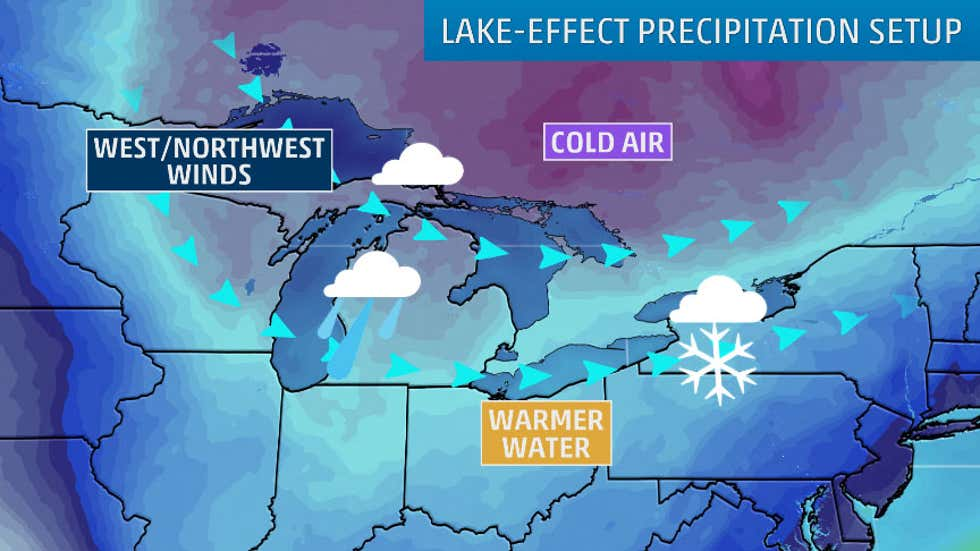

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## EDA

Here 'final_dataset.csv' is the csv file provided by the professor.

In [2]:

file_path = 'final_dataset.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)



In [3]:

df


,DateTime_UTC,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),...,Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Wind Chill (F),Heat Index (F),File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Precip (in)
0,2006-10-01 13:00:00,0.728155,0.477778,0.732558,0.264706,0.833333,0.055556,0.135714,0.204082,0.254032,...,0.626543,0.615269,0.625758,0.985714,0.2,goes11.2006.10.01.1300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1300.v01.nc-var1-t0.csv.csv,"[0.074999996, 0.0725, 0.07, 0.07, 0.0775, 0.06...","[array([ nan, nan, nan, nan, nan...",0.0
1,2006-10-01 14:00:00,0.728155,0.433333,0.709302,0.294118,0.750000,0.055556,0.128571,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",0.0
2,2006-10-01 15:00:00,0.728155,0.411111,0.697674,0.088235,0.750000,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.612275,0.625758,0.985714,0.2,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",0.0
3,2006-10-01 16:00:00,0.718447,0.500000,0.732558,0.176471,0.111111,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",0.0
4,2006-10-01 17:00:00,0.679612,0.677778,0.767442,0.000000,0.000000,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17015,2015-03-31 17:00:00,0.524272,0.488889,0.511628,0.147059,0.055556,0.361111,0.250000,0.387755,0.475806,...,0.538580,0.535928,0.539394,0.842857,0.2,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",0.0
17016,2015-03-31 18:00:00,0.504854,0.566667,0.523256,0.088235,0.916667,0.361111,0.196429,0.265306,0.475806,...,0.543210,0.538922,0.543939,0.842857,0.2,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",0.0
17017,2015-03-31 19:00:00,0.504854,0.622222,0.546512,0.323529,0.861111,0.055556,0.125000,0.204082,0.475806,...,0.564815,0.558383,0.563636,0.757143,0.2,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",0.0
17018,2015-03-31 20:00:00,0.495146,0.833333,0.604651,0.000000,0.000000,0.055556,0.075000,0.097959,0.153226,...,0.569444,0.565868,0.569697,0.757143,0.2,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17020 entries, 0 to 17019
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DateTime_UTC           17020 non-null  object 
 1   Temp (F)               17020 non-null  float64
 2   RH (%)                 17020 non-null  float64
 3   Dewpt (F)              17020 non-null  float64
 4   Wind Spd (mph)         17020 non-null  float64
 5   Wind Direction (deg)   17020 non-null  float64
 6   Peak Wind Gust(mph)    17020 non-null  float64
 7   Low Cloud Ht (ft)      17020 non-null  float64
 8   Med Cloud Ht (ft)      17020 non-null  float64
 9   High Cloud Ht (ft)     17020 non-null  float64
 10  Visibility (mi)        17020 non-null  float64
 11  Atm Press (hPa)        17020 non-null  float64
 12  Sea Lev Press (hPa)    17020 non-null  float64
 13  Altimeter (hPa)        17020 non-null  float64
 14  Wind Chill (F)         17020 non-null  float64
 15  He

In [5]:

# Summary Statistics
df.describe()



,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),Visibility (mi),Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Wind Chill (F),Heat Index (F),Precip (in)
count,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000,17020.000000
mean,0.485428,0.647588,0.524207,0.217773,0.485827,0.137815,0.178456,0.321955,0.307798,0.818625,0.593926,0.589709,0.593839,0.718311,0.185729,0.002695
std,0.140056,0.166739,0.156791,0.149106,0.331324,0.119868,0.218952,0.317036,0.294519,0.300014,0.135707,0.136598,0.135705,0.200195,0.055996,0.017285
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.388350,0.544444,0.418605,0.147059,0.138889,0.055556,0.057143,0.102041,0.100806,0.700000,0.507716,0.504491,0.507576,0.585714,0.200000,0.000000
50%,0.475728,0.655556,0.523256,0.205882,0.555556,0.111111,0.100000,0.163265,0.173387,1.000000,0.604938,0.598802,0.606061,0.742857,0.200000,0.000000
75%,0.572816,0.777778,0.627907,0.294118,0.750000,0.194444,0.175000,0.428571,0.395161,1.000000,0.692901,0.687126,0.692424,0.885714,0.200000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.860000


In [6]:
# Missing Values
df.isnull().sum()



DateTime_UTC             0
Temp (F)                 0
RH (%)                   0
Dewpt (F)                0
Wind Spd (mph)           0
Wind Direction (deg)     0
Peak Wind Gust(mph)      0
Low Cloud Ht (ft)        0
Med Cloud Ht (ft)        0
High Cloud Ht (ft)       0
Visibility (mi)          0
Atm Press (hPa)          0
Sea Lev Press (hPa)      0
Altimeter (hPa)          0
Wind Chill (F)           0
Heat Index (F)           0
File_name_for_1D_lake    0
File_name_for_2D_lake    0
Lake_data_1D             0
Lake_data_2D             0
Precip (in)              0
dtype: int64

## Pre-processing Time-Series Meteorological Dataframe

We are analyzing time-series meteorological data coupled with satellite images, each marked with the same timestamps, to develop a precipitation prediction model. Our dataset optimization involves these steps:

1. **Filtering Out Irrelevant Data:**
   - **Exclude Nighttime Satellite Images:** Nighttime images, offering limited meteorological insights, are removed to focus on more informative daytime data.
   - **Omit Summer Months:** We exclude summer month data, as it's less relevant for precipitation prediction.

2. **Data Type Standardization:**
   - **Conversion of Object Data Types:** We're converting 'object' type data to appropriate formats: 'float' for numerical, 'string' for textual, and 'datetime' for date/time data.

3. **Data Scaling:**
   - Normalization techniques are applied to ensure balanced feature contribution and enhance model performance.

4. **Handling Missing Data:**
   - **Fill Missing Data:** We use forward-fill followed by back-fill to address data gaps, preserving the time-series integrity.
   - **Remove Rows with NaN Values:** Rows with NaN values, particularly in the 'file' column, are removed to maintain dataset quality.

5. **Rearranging Features:**
   - Columns are strategically reorganized based on their relevance and importance in precipitation prediction.

These steps meticulously prepare our dataset, maximizing the effectiveness of our analysis in predicting precipitation.

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def process_dataframe(df):
    # Join Date and Time columns for UTC
    df['DateTime_UTC'] = pd.to_datetime(df['Date_UTC'] + ' ' + df['Time_UTC'])

    # Convert specified columns to float
    columns_to_float = ['Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 
                        'Wind Direction (deg)', 'Peak Wind Gust(mph)', 
                        'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 
                        'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 
                        'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']
    for col in columns_to_float:
        df[col] = pd.to_numeric(df[col], errors='coerce')

    # Store and drop unnecessary columns
    columns_to_drop = ['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 
                       'File_name_for_1D_lake', 'File_name_for_2D_lake', 
                       'Lake_data_1D', 'Lake_data_2D']
    df_dropped = df[columns_to_drop]
    df = df.drop(columns=columns_to_drop)

    # Fill missing values
    df = df.fillna(method='ffill').fillna(method='bfill')

    # Filter rows for time and exclude summer months
    df = df[(df['DateTime_UTC'].dt.hour >= 13) & (df['DateTime_UTC'].dt.hour <= 21)]
    df = df[~df['DateTime_UTC'].dt.month.isin([6, 7, 8])]

    # Scaling
    scaler = MinMaxScaler()
    cols_to_scale = df.columns.difference(['DateTime_UTC', 'Precip (in)'])
    df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

    # Reattach the stored columns ensuring matching indices
    df = pd.concat([df.reset_index(drop=True), df_dropped.loc[df.index].reset_index(drop=True)], axis=1)

    # Drop final unnecessary columns
    columns_to_drop_finally = ['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST']
    df = df.drop(columns=columns_to_drop_finally)

    # Reorder columns
    df = df[["DateTime_UTC"] + [col for col in df.columns if col not in ["DateTime_UTC", "Precip (in)"]] + ["Precip (in)"]]

    # Remove rows where 'File_name_for_1D_lake' is NaN
    df.dropna(subset=['File_name_for_1D_lake'], inplace=True)
    
    # Reset index
    df.reset_index(drop=True, inplace=True)

    return df


In [8]:
df_processed=process_dataframe(df)

In [9]:
df_processed

,DateTime_UTC,Temp (F),RH (%),Dewpt (F),Wind Spd (mph),Wind Direction (deg),Peak Wind Gust(mph),Low Cloud Ht (ft),Med Cloud Ht (ft),High Cloud Ht (ft),...,Atm Press (hPa),Sea Lev Press (hPa),Altimeter (hPa),Wind Chill (F),Heat Index (F),File_name_for_1D_lake,File_name_for_2D_lake,Lake_data_1D,Lake_data_2D,Precip (in)
0,2006-10-01 13:00:00,0.728155,0.477778,0.732558,0.264706,0.833333,0.055556,0.135714,0.204082,0.254032,...,0.626543,0.615269,0.625758,0.985714,0.2,goes11.2006.10.01.1300.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1300.v01.nc-var1-t0.csv.csv,"[0.074999996, 0.0725, 0.07, 0.07, 0.0775, 0.06...","[array([ nan, nan, nan, nan, nan...",0.0
1,2006-10-01 14:00:00,0.728155,0.433333,0.709302,0.294118,0.750000,0.055556,0.128571,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1400.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...","[array([ nan, nan, nan, ...",0.0
2,2006-10-01 15:00:00,0.728155,0.411111,0.697674,0.088235,0.750000,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.612275,0.625758,0.985714,0.2,goes11.2006.10.01.1500.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.06, 0.06, 0.05749...","[array([ nan, nan, nan, ...",0.0
3,2006-10-01 16:00:00,0.718447,0.500000,0.732558,0.176471,0.111111,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1600.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv,"[0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...","[array([ nan, nan, nan, nan, nan...",0.0
4,2006-10-01 17:00:00,0.679612,0.677778,0.767442,0.000000,0.000000,0.055556,0.000000,0.204082,0.254032,...,0.626543,0.613772,0.625758,0.985714,0.2,goes11.2006.10.01.1700.v01.nc-var1-t0.csv,T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv,"[0.067499995, 0.067499995, 0.067499995, 0.07, ...","[array([ nan, nan, nan, nan, nan, nan, n...",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17015,2015-03-31 17:00:00,0.524272,0.488889,0.511628,0.147059,0.055556,0.361111,0.250000,0.387755,0.475806,...,0.538580,0.535928,0.539394,0.842857,0.2,goes15.2015.03.31.1700.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv,"[0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...","[array([ nan, nan, nan, nan, nan...",0.0
17016,2015-03-31 18:00:00,0.504854,0.566667,0.523256,0.088235,0.916667,0.361111,0.196429,0.265306,0.475806,...,0.543210,0.538922,0.543939,0.842857,0.2,goes15.2015.03.31.1800.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv,"[0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...","[array([ nan, nan, nan, nan, nan...",0.0
17017,2015-03-31 19:00:00,0.504854,0.622222,0.546512,0.323529,0.861111,0.055556,0.125000,0.204082,0.475806,...,0.564815,0.558383,0.563636,0.757143,0.2,goes15.2015.03.31.1900.v01.nc-var1-t0.csv,T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv,"[0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...","[array([ nan, nan, nan, ...",0.0
17018,2015-03-31 20:00:00,0.495146,0.833333,0.604651,0.000000,0.000000,0.055556,0.075000,0.097959,0.153226,...,0.569444,0.565868,0.569697,0.757143,0.2,goes15.2015.03.31.2000.v01.nc-var1-t0.csv,T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv,"[0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...","[array([ nan, nan, nan, nan, nan...",0.0


In [10]:
df_processed['DateTime_UTC'] = pd.to_datetime(df_processed['DateTime_UTC'])

In [11]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17020 entries, 0 to 17019
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime_UTC           17020 non-null  datetime64[ns]
 1   Temp (F)               17020 non-null  float64       
 2   RH (%)                 17020 non-null  float64       
 3   Dewpt (F)              17020 non-null  float64       
 4   Wind Spd (mph)         17020 non-null  float64       
 5   Wind Direction (deg)   17020 non-null  float64       
 6   Peak Wind Gust(mph)    17020 non-null  float64       
 7   Low Cloud Ht (ft)      17020 non-null  float64       
 8   Med Cloud Ht (ft)      17020 non-null  float64       
 9   High Cloud Ht (ft)     17020 non-null  float64       
 10  Visibility (mi)        17020 non-null  float64       
 11  Atm Press (hPa)        17020 non-null  float64       
 12  Sea Lev Press (hPa)    17020 non-null  float64       
 13  A

In [12]:
df_processed.isna().sum()

DateTime_UTC             0
Temp (F)                 0
RH (%)                   0
Dewpt (F)                0
Wind Spd (mph)           0
Wind Direction (deg)     0
Peak Wind Gust(mph)      0
Low Cloud Ht (ft)        0
Med Cloud Ht (ft)        0
High Cloud Ht (ft)       0
Visibility (mi)          0
Atm Press (hPa)          0
Sea Lev Press (hPa)      0
Altimeter (hPa)          0
Wind Chill (F)           0
Heat Index (F)           0
File_name_for_1D_lake    0
File_name_for_2D_lake    0
Lake_data_1D             0
Lake_data_2D             0
Precip (in)              0
dtype: int64

## Image generation for appropriate timestamp

Getting the latitude and longitude values for the michigan lake

In [13]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

,latitude,longitude
0,41.78,-87.54
1,41.78,-87.50
2,41.78,-87.46
3,41.78,-87.42
4,41.78,-87.38


In [14]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

since the image array is a string, we need to convert it into float array and replace nan values with 0.0

In [15]:
import math

def convert_string_to_floats(input_string):
    """
    Converts a string representation of a list with potential 'nan' values
    to a list of floats, replacing 'nan' with 0.0.

    Args:
    input_string (str): A string representation of a list of floats.

    Returns:
    list: A list of floats with 'nan' replaced by 0.0.
    """
    # Replace 'nan' with 'float("nan")' to make it evaluable
    input_string = input_string.replace('nan', 'float("nan")')

    # Evaluate the string to convert it into a list
    values_with_nan = eval(input_string)

    # Replace 'nan' (float("nan")) with 0.0
    return [0.0 if math.isnan(value) else value for value in values_with_nan]


Function to take float array and convert into images and save it to a folder

In [16]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1
    val = convert_string_to_floats(val)
    if len(lat) == len(lon) == len(val):
        # Create a figure and axis object, add scatter plot
        fig, ax = plt.subplots(figsize=(10, 10))
        sc = ax.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')

        # Turn off the axis
        ax.axis('off')

        # Save the figure
        fig.savefig(f'new_final_images/{fig_name}.png')

        # Close the figure to free up memory
        plt.close(fig)
        status_code = 0
    else:
        status_code = 255

    return status_code

Function to store the image names as the DateTime_UTC given in the dataset

In [17]:
# from tqdm import tqdm
# for i, row in tqdm(df_processed.iterrows()):

#     try:
#         arrays_2_png_data(lat_lst, lon_lst, row.Lake_data_1D, row.DateTime_UTC)
#     except: 
#         print("oopsie at row:", i)

Example picture

In [18]:
def arrays_2_png_display(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    val = convert_string_to_floats(val)
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [19]:
def extract_before_last_dot(input_string):
    """
    Extracts the part of the string before the last dot ('.').

    Args:
    input_string (str): The input string.

    Returns:
    str: The part of the string before the last dot.
    """
    # Find the position of the last dot
    last_dot_position = input_string.rfind('.')
    
    # Extract and return the part of the string before the last dot
    return input_string[:last_dot_position] if last_dot_position != -1 else input_string



0

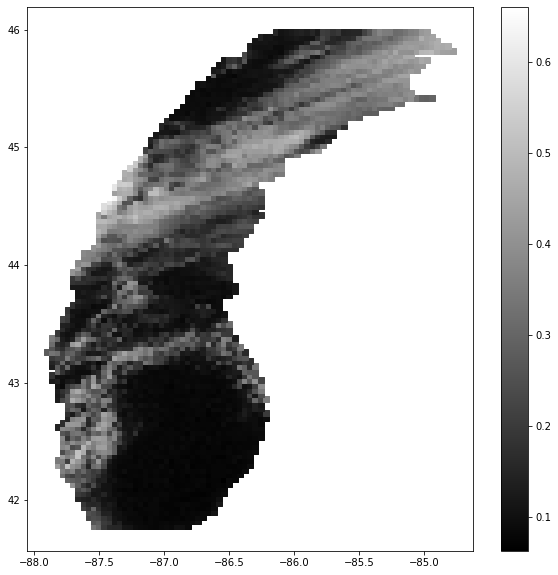

In [20]:
arrays_2_png_display(lat_lst, lon_lst, df_processed['Lake_data_1D'][40], extract_before_last_dot(df_processed['File_name_for_1D_lake'][40]))

Since we need these images to train our CNN model later, we are further processing the images to mask it and convert it 64x64 size

In [21]:
# from PIL import Image, ImageOps
# import numpy as np
# import os
# import imghdr
# from tqdm import tqdm

# f = 'new_final_images'
# g = 'new_final_images_64'

# if not os.path.exists(g):
#     os.makedirs(g)

# for file in tqdm(os.listdir(f)):
#     f_img = os.path.join(f, file)
#     g_img = os.path.join(g, file)

#     # Check if the file is an image
#     if imghdr.what(f_img):
#         img = Image.open(f_img)
#         img = ImageOps.grayscale(img)
#         full = np.full(img.size, 255)
#         mask = (full - np.array(img)).astype(np.uint8)
#         newimg = np.array(img) * mask  # mask with the lake michigan mask to zero out land region
#         newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64, 64))
#         newimg64.save(g_img)


In [22]:
df_RNN=df_processed

Converting 64x64 image into numpy 2D array and storing it in a column

In [23]:
import pandas as pd
import numpy as np
import cv2
import os

# Define the folder where your images are stored
image_folder = 'new_final_images_64'

# Function to load an image and convert it to a numpy array
def load_image_to_numpy(file_path):
    # Load the image
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # Use IMREAD_GRAYSCALE for 2D, IMREAD_COLOR for 3D
    # Convert to numpy array
    return np.array(image)

# Create a new column for the image data
df_RNN['image_data'] = None

# Loop through the DataFrame and fetch images
for index, row in df_RNN.iterrows():
    # Construct the file path
    file_path = os.path.join(image_folder, f"{row['DateTime_UTC']}.png")  # Adjust the extension if needed

    # Check if file exists
    if os.path.exists(file_path):
        # Load the image and add to the DataFrame
        df_RNN.at[index, 'image_data'] = load_image_to_numpy(file_path)
    else:
        print(f"Image not found for date: {row['DateTime_UTC']}")


### Feature Engineering 
Creating Average Precipitation by date for more information

In [24]:
# Group by the 'Date' and calculate the mean precipitation
avg_precipitation = df_RNN.groupby(df_RNN['DateTime_UTC'].dt.date)['Precip (in)'].mean()



In [25]:
# Map the average precipitation back to the original dataframe
df_RNN['Avg_Daily_Precipitation'] = df_RNN['DateTime_UTC'].dt.date.map(avg_precipitation)

### Binning the Target vairable
Binning 'Precip (in)' based on global range of the dataframe into 4 categories 'bit of rain', 'lotsa rain', 'medium rain', 'no rain' where 'no rain' is where the value is 0 and thes rest is divied into 3 intervals.

In [26]:
# Define the bins
min_nonzero = df_RNN['Precip (in)'][df_RNN['Precip (in)'] > 0].min()
max_value = df_RNN['Precip (in)'].max()
bins = [0, min_nonzero] + list(np.linspace(min_nonzero, max_value, 4))[1:]  # 0 as its own class, then 3 equal intervals




In [27]:
# Add the categories as a new column to the DataFrame
df_RNN['PrecipCategory'] = pd.cut(df_RNN['Precip (in)'], bins, labels=['no rain', 'bit of rain', 'medium rain', 'lotsa rain'], 
                               include_lowest=True, right=False)


During binning, the last value is not inclusive, so explicitly filling in the 'PrecipCategory' of the remaining rows

In [28]:
df_RNN['PrecipCategory']=df_RNN['PrecipCategory'].fillna('lotsa rain')

In [29]:
# Find unique values and their counts
unique_values, counts = np.unique(df_RNN['PrecipCategory'], return_counts=True)

total_count = np.sum(counts)

# Display the results with percentage
for value, count in zip(unique_values, counts):
    percentage = (count / total_count) * 100  # Calculate percentage
    print(f"{value}: {count} times ({percentage:.2f}%)")

bit of rain: 1336 times (7.85%)
lotsa rain: 3 times (0.02%)
medium rain: 5 times (0.03%)
no rain: 15676 times (92.10%)


Skewed Target variable visualization

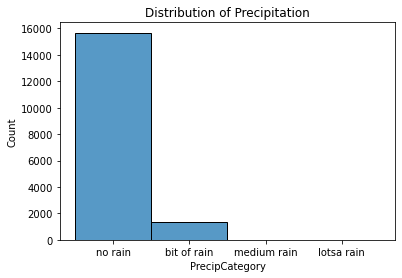

In [30]:
# Histogram of the target variable
sns.histplot(df_RNN['PrecipCategory'])
plt.title('Distribution of Precipitation')
plt.show()

Time-series plot of 'Precip (in)' over the years

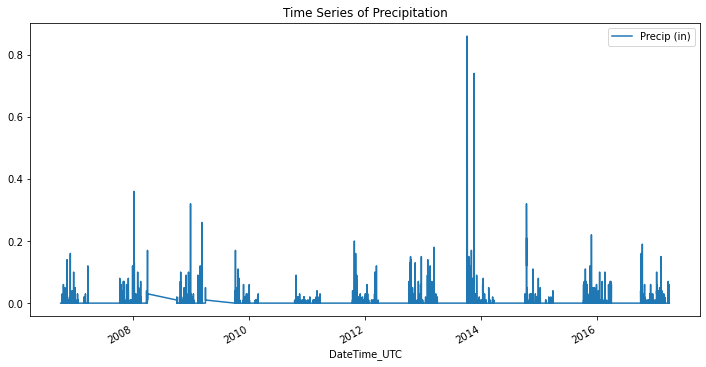

In [31]:
# Time series plot
df_RNN.plot(x='DateTime_UTC', y='Precip (in)', figsize=(12, 6))
plt.title('Time Series of Precipitation')
plt.show()

Pair plot of few of the features

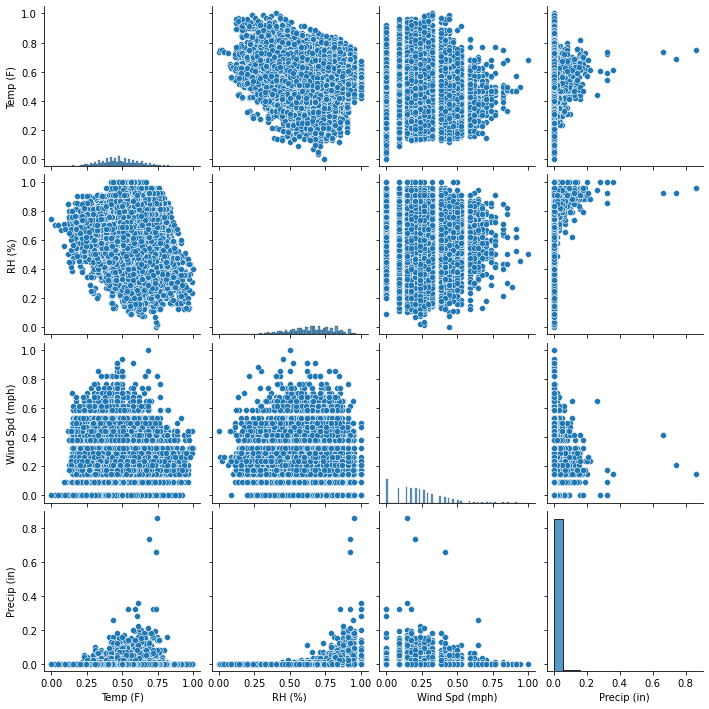

In [32]:
# Pairplot for selected features
sns.pairplot(df_RNN[['Temp (F)', 'RH (%)', 'Wind Spd (mph)', 'Precip (in)']])
plt.show()

In [33]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'PrecipCategory' column
df_RNN['PrecipCategory_Encoded'] = label_encoder.fit_transform(df_RNN['PrecipCategory'])

## Create Sequences
Trimming the last 4 rows since we need to convert the dataframe to sequences to feed it into the model. We are trying to have sequences of 24 rows (8 hours for 3 days) and then predict the rainfall category for the next 8 rows (1 day).

In [34]:
df_trimmed = df_RNN.iloc[:-4]

In [35]:
df_final = df_trimmed.drop(columns = ['File_name_for_1D_lake',
       'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Precip (in)', 'PrecipCategory'])

### Feature Importance

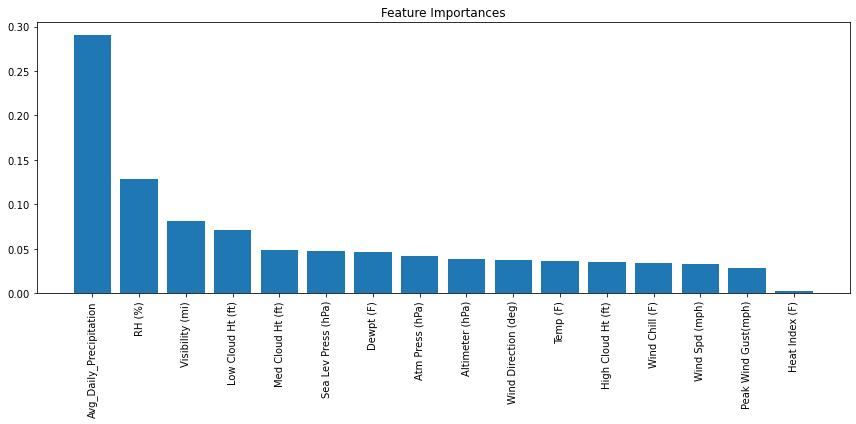

In [36]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Split the data into features and target
X_ft = df_final.drop(columns=['PrecipCategory_Encoded','DateTime_UTC','image_data'])

y_ft = df_final['PrecipCategory_Encoded']

# Initialize and train the model
model_R = RandomForestClassifier(n_estimators=100, random_state=42)

model_R.fit(X_ft, y_ft)

# Get feature importances
importances = model_R.feature_importances_

# Sort the feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_ft.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_ft.shape[1]), X_ft.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()


In [37]:
import numpy as np
import pandas as pd

time_series_columns = [ 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 
                       'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)',
                       'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)',
                       'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)',
                       'Wind Chill (F)', 'Heat Index (F)', 'Avg_Daily_Precipitation']
image_column = 'image_data'
target_column = 'PrecipCategory_Encoded'

# Convert time series data to numpy array
time_series_data = df_final[time_series_columns].to_numpy()

# Reshape image data
num_samples, image_height, image_width, channels = len(df_final), *df_final[image_column].iloc[0].shape, 1
X_images = np.zeros((num_samples, image_height, image_width, channels))

for i in range(num_samples):
    X_images[i, :, :, 0] = df_final[image_column].iloc[i]

# Create sequences
sequence_length = 24
prediction_length = 8
num_features = len(time_series_columns)

X_time_series = []
X_img_seq = []
y = []

for i in range(len(df_final) - sequence_length - prediction_length + 1):
    X_time_series.append(time_series_data[i:i+sequence_length])
    X_img_seq.append(X_images[i:i+sequence_length])
    y.append(df[target_column].iloc[i+sequence_length:i+sequence_length+prediction_length].values)

X_time_series = np.array(X_time_series)
X_img_seq = np.array(X_img_seq)
y = np.array(y)

# Reshape X_img_seq to add the time dimension
X_img_seq = X_img_seq.reshape(-1, sequence_length, image_height, image_width, channels)

print(f'X_time_series shape: {X_time_series.shape}') # Should be (num_samples, 24, num_features)
print(f'X_img_seq shape: {X_img_seq.shape}') # Should be (num_samples, 24, image_height, image_width, channels)
print(f'y shape: {y.shape}') # Should be (num_samples, 8)


X_time_series shape: (16985, 24, 16)
X_img_seq shape: (16985, 24, 64, 64, 1)
y shape: (16985, 8)


Train_test_split function for time-series data, where test split is in future from the train split

In [38]:
def train_test_split_time_series(X_time_series, X_img_seq, y, test_size):
    """
    Splits the time series data into train and test sets.
    
    Parameters:
    X_time_series: Array of time series data
    X_img_seq: Array of image sequence data
    y: Array of target labels
    test_size: Fraction of the dataset to include in the test split (e.g., 0.2 for 20%)

    Returns:
    X_time_series_train, X_time_series_test, X_img_seq_train, X_img_seq_test, y_train, y_test
    """

    # Determine the split index
    total_samples = X_time_series.shape[0]
    test_samples = int(total_samples * test_size)
    train_samples = total_samples - test_samples

    # Split the time series data
    X_time_series_train = X_time_series[:train_samples]
    X_time_series_test = X_time_series[train_samples:]

    # Split the image sequence data
    X_img_seq_train = X_img_seq[:train_samples]
    X_img_seq_test = X_img_seq[train_samples:]

    # Split the labels
    y_train = y[:train_samples]
    y_test = y[train_samples:]

    return X_time_series_train, X_time_series_test, X_img_seq_train, X_img_seq_test, y_train, y_test

# Example usage
test_size = 0.2  # For example, 20% of the data is used as the test set
X_time_series_train, X_time_series_test, X_img_seq_train, X_img_seq_test, y_train, y_test = train_test_split_time_series(X_time_series, X_img_seq, y, test_size)


In [39]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train, num_classes=4)
y_test_one_hot = to_categorical(y_test, num_classes=4)

## Model Architecture

## LSTM (Long Short-Term Memory)

LSTMs are advanced RNNs designed to capture long-term dependencies in sequential data. They consist of:

- **Cell State:** The 'memory' of the network, carrying information across the sequence.
- **Gates:** Including the forget gate (controls information to discard), input gate (updates with new information), and output gate (determines the next hidden state).

LSTMs excel in learning from sequences like time series.

## ConvLSTM2D

ConvLSTM2D incorporates convolution operations into LSTM, making it suitable for spatio-temporal data. It features:

- **Convolutional Operations:** Replace matrix multiplications in traditional LSTMs, capturing spatial relationships.
- **Temporal Dynamics:** Maintains LSTM's ability to understand time sequences.

Ideal for applications like weather data.

## Combining LSTM and ConvLSTM2D

A hybrid model using both LSTM and ConvLSTM2D can capture complex spatial and sequential patterns:

1. **ConvLSTM2D Layers:** Analyze spatial and temporal aspects within data points (e.g., video frames).
2. **LSTM Layers:** Process these aspects over longer sequences for higher-level understanding (e.g., video narrative).

This combination is powerful for tasks requiring detailed spatial and broader sequential comprehension.


The model is a multi-input neural network for processing time series and image data:

1. **Time Series Branch:** Processes time series data through an LSTM layer, taking input with 24 time steps and an unspecified number of features.

2. **Image Branch:** Handles sequences of images using a ConvLSTM2D layer, followed by a Flatten layer, for spatial-temporal data analysis.

3. **Combination and Processing:** The outputs of both branches are concatenated and then passed through two Dense layers and a Dropout layer for further processing and regularization.

4. **Output:** The final output layer, with a softmax activation, is designed for a classification task (reshaped to match the target shape of `(num_samples, 8, 4)`).

5. **Model Configuration:** It uses the Adam optimizer, a learning rate of 0.0001, and is compiled with 'categorical_crossentropy' loss and accuracy metric.

This architecture is useful for tasks where both historical data (time series) and visual data (images) are key for predictions.




In [40]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten, ConvLSTM2D, concatenate, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
import tensorflow as tf

# Time series input branch
input_ts = Input(shape=(24, X_time_series.shape[2]))
lstm_ts = LSTM(64, return_sequences=False)(input_ts)

# Image input branch
input_img = Input(shape=(24, X_images.shape[1], X_images.shape[2], X_images.shape[3]))
convlstm_img = ConvLSTM2D(filters=32, kernel_size=(3, 3), padding='same', return_sequences=False)(input_img)  # Set return_sequences=False
flatten_img = Flatten()(convlstm_img)

# Concatenate both branches
combined = concatenate([lstm_ts, flatten_img])

# Fully connected layers
dense1 = Dense(64, activation='relu')(combined)
dense2 = Dense(32, activation='relu')(dense1)
dropout2 = Dropout(0.5)(dense2)

# Output layer for 8 hours prediction (4 classes for each of the 8 hours)
output = Dense(8 * 4, activation='softmax')(dropout2)
output = tf.reshape(output, (-1, 8, 4))  # Reshape to match target shape (num_samples, 8, 4)

# Build and compile the model
model_test2 = Model(inputs=[input_ts, input_img], outputs=output)
# optimizer = Adam(learning_rate=0.000001, clipnorm=1.0)
optimizer_test2 = Adam(learning_rate=0.0001)
model_test2.compile(optimizer=optimizer_test2, loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model_test2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 24, 64, 64, 1)]      0         []                            
                                                                                                  
 input_1 (InputLayer)        [(None, 24, 16)]             0         []                            
                                                                                                  
 conv_lstm2d (ConvLSTM2D)    (None, 64, 64, 32)           38144     ['input_2[0][0]']             
                                                                                                  
 lstm (LSTM)                 (None, 64)                   20736     ['input_1[0][0]']             
                                                                                              

### Checkpointing

In [41]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
checkpoint_path_test2 = "new_check/model_mile3.hdf5"

# Create a callback that saves the model's weights
checkpoint_callback_test2 = ModelCheckpoint(filepath=checkpoint_path_test2,
                                      save_weights_only=True,
                                      save_best_only=False,
                                      save_freq='epoch',
                                      verbose=1)

### Loading weights for further use

In [42]:
latest_checkpoint2 = "new_check/model_mile3.hdf5"  # Example path
model_test2.load_weights(latest_checkpoint2)

### Training the model

In [43]:
# # Train the model
# history_test2 = model_test2.fit(
#     [X_time_series_train, X_img_seq_train],  # Inputs: Time series data and image sequences
#     y_train_one_hot,                           # Target data
#     epochs=20,                   # Number of epochs to train the model
#     batch_size=128,               # Batch size
#     validation_split=0.2,
#     callbacks=[checkpoint_callback_test2]# Fraction of data to use for valida             # Shuffle the data in each epoch
# )


### Saving and loading the model

In [44]:
# model_test2.save('model_mile3.h5')

In [45]:
from tensorflow.keras.models import load_model

model_test2 = load_model('model_mile3.h5')

### Saving and loading the history

In [46]:
# import pickle

# # Save the history
# with open('history_mile3_model.pkl', 'wb') as file_pi:
#     pickle.dump(history_test2.history, file_pi)


In [47]:
import pickle
history_path = 'history_mile3_model.pkl'
with open(history_path, 'rb') as file:
    history_test2 = pickle.load(file)

In [48]:
history_test2

{'loss': [1.0595808029174805,
  0.9786989688873291,
  0.8861973285675049,
  0.7915163040161133,
  0.6986749768257141,
  0.6196901202201843,
  0.5531080365180969,
  0.4951356053352356,
  0.4446139931678772,
  0.40941286087036133,
  0.36938488483428955,
  0.34429988265037537,
  0.3145422339439392,
  0.2865946590900421,
  0.2680695652961731,
  0.251352459192276,
  0.23997889459133148,
  0.23264272511005402,
  0.21941973268985748,
  0.20882897078990936],
 'accuracy': [0.5468721389770508,
  0.5898343920707703,
  0.6400874257087708,
  0.7011499404907227,
  0.7544503211975098,
  0.7929278016090393,
  0.8223780989646912,
  0.8457451462745667,
  0.8596135973930359,
  0.8710441589355469,
  0.8807957768440247,
  0.8864995241165161,
  0.8938132524490356,
  0.9008739590644836,
  0.9055312871932983,
  0.9088086485862732,
  0.9120399951934814,
  0.9134199619293213,
  0.9171687960624695,
  0.9186062812805176],
 'val_loss': [1.2738282680511475,
  1.2398182153701782,
  1.2084861993789673,
  1.1728934049

### Plotting the model loss

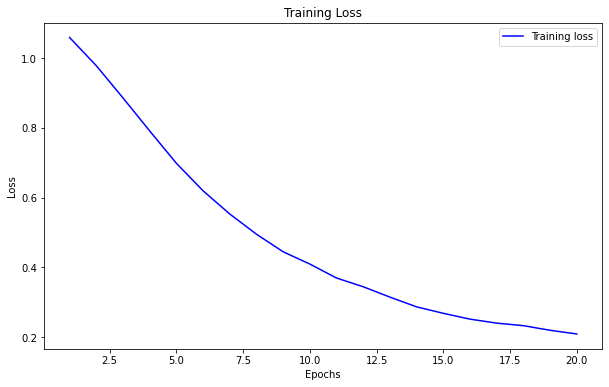

In [49]:
import matplotlib.pyplot as plt


loss = history_test2['loss'] #val_loss

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, color='blue', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

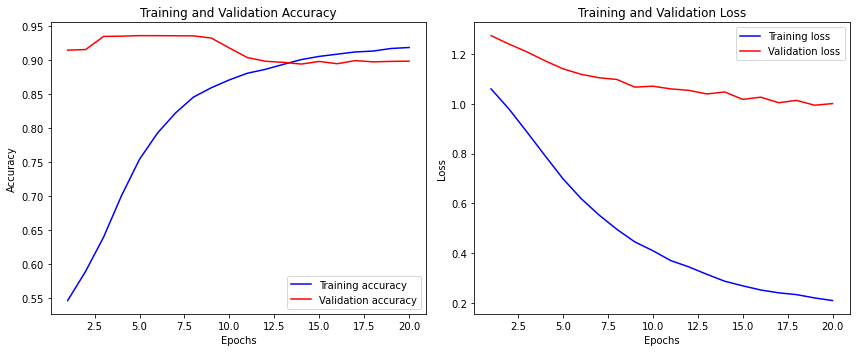

In [50]:
import matplotlib.pyplot as plt

# Extracting accuracy and loss values
acc = history_test2['accuracy']
val_acc = history_test2['val_accuracy']
loss = history_test2['loss']
val_loss = history_test2['val_loss']
epochs = range(1, len(acc) + 1)

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


### Class-1 accuracy

In the context of our project, calculating class-1 accuracy (also known as top-1 accuracy) is a vital aspect, especially since our model handles classification tasks involving a probability distribution across multiple classes. Notably, class-1 accuracy becomes particularly significant in scenarios characterized by imbalanced datasets. In such situations, where certain classes are under-represented, class-1 accuracy offers a valuable measure of our model's performance in accurately predicting the most likely class. This metric thus serves as a useful tool in gauging the effectiveness of our model under specific conditions of class distribution.

In [51]:
import numpy as np
from sklearn.metrics import accuracy_score

y_pred_test2 = model_test2.predict([X_time_series_test, X_img_seq_test])
y_pred_labels_test2 = np.argmax(y_pred_test2, axis=-1)


107/107 [==============================] - 57s 529ms/step


### Unique values predicted and thier count

In [52]:
# Find unique values and their counts
unique_values, counts = np.unique(y_pred_labels_test2, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

0: 167 times
3: 27009 times


### Unique values in test dataset and thier count

In [53]:
# Find unique values and their counts
unique_values, counts = np.unique(y_test, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

0: 2041 times
2: 16 times
3: 25119 times


### Unique values in train dataset and thier count

In [54]:
# Find unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# Display the results
for value, count in zip(unique_values, counts):
    print(f"{value}: {count} times")

0: 8647 times
1: 24 times
2: 24 times
3: 100009 times


## Accuracy, F1, Precision, Recall

- In the test set, category 1 is missing, and in the predicted set, both category 1 and 2 are missing, precision and recall for both categories would be 0.There are no true positives or predicted positives for either category, resulting in zero precision and recall values due to a lack of relevant instances to evaluate.
- Here, we have class 1 accuracy as 1.0 since we don't have class 1 in the test dataset as shown above

In [55]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

In [56]:
def calculate_precision(y_test,y_pred, category):
    y_pred_class = (y_pred == category)
    y_true_class = (y_test == category)
    y_true_class_lists = [[int(value) for value in sublist] for sublist in y_true_class]
    y_true_class_flattened_list = [item for sublist in y_true_class_lists for item in sublist]
    y_pred_class_lists = [[int(value) for value in sublist] for sublist in y_pred_class]
    y_pred_class_flattened_list = [item for sublist in y_pred_class_lists for item in sublist]
    return precision_score(y_true_class_flattened_list,y_pred_class_flattened_list)

def calculate_recall(y_test,y_pred, category):
    y_pred_class = (y_pred == category)
    y_true_class = (y_test == category)
    y_true_class_lists = [[int(value) for value in sublist] for sublist in y_true_class]
    y_true_class_flattened_list = [item for sublist in y_true_class_lists for item in sublist]
    y_pred_class_lists = [[int(value) for value in sublist] for sublist in y_pred_class]
    y_pred_class_flattened_list = [item for sublist in y_pred_class_lists for item in sublist]
    return recall_score(y_true_class_flattened_list,y_pred_class_flattened_list)

def calculate_f1(y_test,y_pred, category):
    y_pred_class = (y_pred == category)
    y_true_class = (y_test == category)
    y_true_class_lists = [[int(value) for value in sublist] for sublist in y_true_class]
    y_true_class_flattened_list = [item for sublist in y_true_class_lists for item in sublist]
    y_pred_class_lists = [[int(value) for value in sublist] for sublist in y_pred_class]
    y_pred_class_flattened_list = [item for sublist in y_pred_class_lists for item in sublist]
    return f1_score(y_true_class_flattened_list,y_pred_class_flattened_list)

def calculate_accuracy(y_test,y_pred, category):
    y_pred_class = (y_pred == category)
    y_true_class = (y_test == category)
    return accuracy_score(y_true_class,y_pred_class)

# Function to reverse label encoding
def reverse_label_encode(encoded_label, reverse_mapping):
    return reverse_mapping[encoded_label]

In [57]:
# Example usage
encoded_labels = [0, 1, 2, 3]
original_labels = label_encoder.inverse_transform(encoded_labels)
print(original_labels)


['bit of rain' 'lotsa rain' 'medium rain' 'no rain']


In [58]:
reverse_mapping = {0:'bit of rain',1: 'lotsa rain',2: 'medium rain',3:'no rain'}


In [59]:
# Assuming calculate_precision function is already defined

# Example usage
actual_labels = y_test  # Replace with your actual labels
predicted_labels = y_pred_labels_test2  # Replace with your predicted labels

print("Precision score for each category:")
for category in range(4):  # Assuming there are 4 categories: 0, 1, 2, 3
    precision = calculate_precision(actual_labels, predicted_labels, category)
    original_label = reverse_label_encode(category, reverse_mapping)
    print(f"{original_label}: {precision}")


Precision score for each category:
bit of rain: 0.029940119760479042
lotsa rain: 0.0
medium rain: 0.0
no rain: 0.9240253248917027


/home/indoria.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/indoria.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
print("Recall score for each category:")
for category in range(4):  # Assuming there are 4 categories: 0, 1, 2, 3
    recall = calculate_recall(actual_labels, predicted_labels, category)
    original_label = reverse_label_encode(category, reverse_mapping)
    print(f"{original_label}: {recall}")


Recall score for each category:
bit of rain: 0.002449779519843214
lotsa rain: 0.0


/home/indoria.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


medium rain: 0.0
no rain: 0.9935506986743102


## F1 Score

The F1 score is a metric used to evaluate the balance between precision and recall in classification tasks. It is particularly useful in situations where the class distribution is imbalanced or when false positives and false negatives carry different costs.

### Formula

The F1 score is the harmonic mean of precision and recall, given by the formula:

```markdown
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)
```

where:

- **Precision** is the ratio of correctly predicted positive observations to the total predicted positives. It is given by:

```markdown
Precision = (True Positives) / (True Positives + False Positives)
```

- **Recall** (also known as sensitivity) is the ratio of correctly predicted positive observations to the all observations in actual class. It is given by:

```markdown
Recall = (True Positives) / (True Positives + False Negatives)
```

### Interpretation

- An F1 score reaches its best value at 1 (perfect precision and recall) and its worst at 0.
- It is a good way to show that a classifer has a good balance between precision and recall.
- A higher F1 score indicates better performance.


In [61]:
print("F1 score for each category:")
for category in range(4):  # Assuming there are 4 categories: 0, 1, 2, 3
    f1 = calculate_f1(actual_labels, predicted_labels, category)
    original_label = reverse_label_encode(category, reverse_mapping)
    print(f"{original_label}: {f1}")


F1 score for each category:
bit of rain: 0.004528985507246377
lotsa rain: 0.0
medium rain: 0.0
no rain: 0.9575276243093921


/home/indoria.r/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1760: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


## Accuracy Score

**Definition:**
It measures the proportion of correct predictions made by the model over all predictions.

**Formula:**
The formula for calculating accuracy is:

```markdown
Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
```

In this formula:
- *Number of Correct Predictions* is the count of instances where the model's prediction matched the actual label.
- *Total Number of Predictions* is the count of all predictions made by the model, including both correct and incorrect predictions.

**Interpretation:**
- An accuracy score of 1 (or 100%) means the model correctly predicted every instance.
- An accuracy score of 0 means the model failed to correctly predict any instance.

In [62]:
print("Accuracy score for each category:")
for category in range(4):  # Assuming there are 4 categories: 0, 1, 2, 3
    acc = calculate_accuracy(actual_labels, predicted_labels, category)
    original_label = reverse_label_encode(category, reverse_mapping)
    print(f"{original_label}: {acc}")


Accuracy score for each category:
bit of rain: 0.7324109508389756
lotsa rain: 1.0
medium rain: 0.9973506034736532
no rain: 0.7324109508389756


## Conclusion

Our project journey involved the exploration and integration of various neural netowork models to analyze spatio-temporal data, ultimately leading us to develop a hybrid approach. Here's a recap of things tried in previous iterations of the project.

- **Initial Approach**: Started with a simple RNN model focusing on 'Precip (in)' as the target variable. Achieved a high accuracy of 99.5%, primarily due to its tendency to predict '0' or no rain.

- **RNN and CNN Integration**: Experimented with a combined RNN and CNN model. The RNN processed time-series data sequences, while the CNN handled individual images per timestamp. This model also showed high accuracy but didn't fully capture the data's complexity.

- **Incorporating Class Weights**: Added class weights in training to penalize the model more for incorrect predictions, especially for underrepresented classes. This helped in addressing the class imbalance issue but didn't completely resolve it.

- **Oversampling Minority Class**: Attempted oversampling the minority class to provide more data for the model. However, the limited representation of these classes limited the effectiveness of this approach.

- **Hybrid LSTM and ConvLSTM Model**: The final breakthrough was developing a hybrid model combining LSTM (for time-series data) and ConvLSTM (for image data). This model processes sequences of images over time, providing a comprehensive understanding of spatio-temporal data, especially in imbalanced datasets.

- **Feature Correlation Reduction**: Tested the removal of highly correlated features to streamline the dataset. Despite some improvements in data clarity, the hybrid LSTM and ConvLSTM model remained superior, effectively leveraging the comprehensive data, including correlated features.